In [27]:
import sklearn
print(sklearn.__version__)

0.23.2


In [28]:
import xgboost
print(xgboost.__version__)

0.90


In [29]:
import lightgbm
print(lightgbm.__version__)

3.2.1


In [30]:
#importing libraries

import pandas as pd
'''
from numpy import mean
from numpy import std
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
'''



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score, cross_val_predict


from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

In [31]:
#importing datasets
train_dataset = pd.read_csv('feature_engineered_train_dataset.csv', header=0) #, header=0, parse_dates=['datetime']
train_dataset = train_dataset.drop(labels= 'Unnamed: 0' , axis=1)
train_dataset.head()


,year,month,day,day_of_week,day_of_year,quarter,hour,minute,second,temp,cond,do,turb,chl-a
0,2019,3,28,3,87,1,0,43,9,30.67318,94.64645,7.890586,34.89499,329.58420
1,2019,3,13,2,72,1,3,58,5,29.37799,88.46648,2.994163,28.22379,75.43412
2,2019,3,12,1,71,1,1,38,5,29.63066,87.79338,3.759133,27.81244,61.83861
3,2019,3,27,2,86,1,11,33,9,30.25711,94.01340,7.265454,59.38213,328.57310
4,2019,10,3,3,276,4,10,43,9,28.85477,113.77930,5.524088,111.27610,738.35680


In [32]:
#importing datasets
test_dataset = pd.read_csv('feature_engineered_test_dataset.csv', header=0) #, header=0, parse_dates=['datetime']
test_dataset = test_dataset.drop(labels= 'Unnamed: 0' , axis=1)
test_dataset.head()


,year,month,day,day_of_week,day_of_year,quarter,hour,minute,second,temp,cond,do,turb,chl-a
0,2019,2,20,2,51,1,12,0,0,29.55674,92.12651,6.491213,32.86783,39.64875
1,2019,2,20,2,51,1,12,10,0,29.59175,92.22813,6.724226,24.30492,40.57396
2,2019,2,20,2,51,1,12,20,0,29.57693,91.93182,6.677357,47.46174,40.88269
3,2019,2,20,2,51,1,12,40,0,29.64378,92.78736,7.629431,26.58170,47.05107
4,2019,2,20,2,51,1,14,40,0,29.67038,91.74003,8.935707,40.49232,59.39921


In [33]:
train_X = train_dataset.iloc[:,0:13]
print(train_X.shape)
train_Y = train_dataset.iloc[:, 13]
print(train_Y.shape)

test_X = test_dataset.iloc[:,0:13]
print(test_X.shape)
test_Y = test_dataset.iloc[:, 13]
print(test_Y.shape)

(6813, 13)
(6813,)
(1703, 13)
(1703,)


In [34]:
#Preprocessing with MaxAbsScaler

MaxAbsScaler = MaxAbsScaler()
train_X = MaxAbsScaler.fit_transform(train_X)

test_X = MaxAbsScaler.fit_transform(test_X)
train_X.shape
print(train_X)

[[1.         0.3        0.90322581 ... 0.78118266 0.60449114 0.12825136]
 [1.         0.3        0.41935484 ... 0.73017509 0.2293803  0.10373236]
 [1.         0.3        0.38709677 ... 0.72461953 0.28798401 0.1022205 ]
 ...
 [1.         0.4        0.12903226 ... 0.61107588 0.04694523 0.20985557]
 [1.         0.3        0.61290323 ... 0.79371622 0.68367788 0.90942794]
 [1.         0.3        0.09677419 ... 0.8153153  0.46290531 0.2064666 ]]


In [44]:
# #LightGBM Model
# model = LGBMRegressor()
# cv = RepeatedKFold(n_splits=10, n_repeats=3)
# n_scores = cross_val_score(model, train_X, train_Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# hyper_params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': ['l1','l2'],
#     'learning_rate': 0.005,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 10,
#     'verbose': 0,
#     "max_depth": 8,
#     "num_leaves": 128,  
#     "max_bin": 512,
#     "num_iterations": 100000
# }

from lightgbm import LGBMRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std


model = LGBMRegressor(min_data_in_leaf= 20)
cv = RepeatedKFold(n_splits=10, n_repeats=3)
n_scores = cross_val_score(model, train_X, train_Y, scoring='neg_mean_absolute_error', cv=cv) #, n_jobs=-1, error_score='raise'
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model = LGBMRegressor()
model.fit(train_X, train_Y)


yhat = model.predict(test_X)

print('Prediction: %.3f' % yhat[0])
print('Actual: %.3f' % test_Y[0])

# param = {
#          'min_data_in_leaf': 20    # set dangerously low for demo purpose
# }

# gbm = lgb.LGBMRegressor(param) #**hyper_params



# gbm.fit(train_X, train_Y,
#         eval_set=[(test_X, test_Y)],
#         eval_metric='rmse')



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

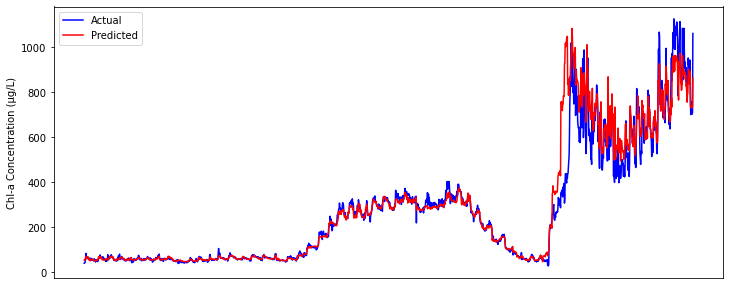

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(test_Y, color='blue', label = 'Actual')

plt.plot(yhat, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel('February to March')
plt.legend()
plt.show()

In [47]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE
rmse = sqrt(mean_squared_error(test_Y, yhat))
print('Test RMSE: %.3f' % rmse)

# rmse = sqrt(mean_squared_error(train_labels_rand, yhat_trn))
# print('Train RMSE: %.3f' % rmse)

print('Test R2 Score: ', r2_score(test_Y, yhat))

# print('Train R2 Score: ', r2_score(train_labels_rand, yhat_trn))

Test RMSE: 71.029
Test R2 Score:  0.9223477951644417
